In [15]:
import YoutubeParse

import re

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages

from datetime import datetime
from collections import defaultdict



In [16]:
youtube_data = YoutubeParse.get_data()

youtube_data.search_data()
youtube_data.watch_data()
youtube_data.comments_data()
youtube_data.like_data()
youtube_data.subscriptions_data()

pp = PdfPages('Report.pdf')

In [4]:
def make_yearly_plot():
    yearly_watches = defaultdict(int)
    
    for time in youtube_data.watch_metrics['timestamps']:
        year = time.year
        yearly_watches[year] += 1
        
    #print(list(yearly_watches.keys()),list(yearly_watches.values()))
    plt.figure(figsize=(10,5))
    sns.set(style='dark',font_scale = 1.3)
    splot = sns.lineplot(x=list(yearly_watches.keys()), y=list(yearly_watches.values()))
    splot.grid(True)
    plt.title("No. of Videos Watched Over the Years")
    pp.savefig()

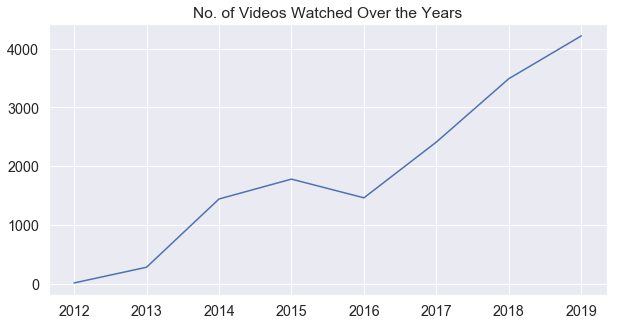

In [5]:
make_yearly_plot()

In [6]:
def make_activity_bar():
    X = ['searched','watched','channels','subscribed','comments','likes']
    Y = [len(youtube_data.search_text), 
         len(youtube_data.watch_metrics['videos']),
         len(set(youtube_data.watch_metrics['channels'])),
         youtube_data.total_subscriptions,
         youtube_data.comments_metrics['no_of_comments'],
         youtube_data.total_likes]
    #print(Y)

    plt.figure(figsize=(10,5))
    sns.set(style='whitegrid', font_scale = 1.3)
    splot = sns.barplot(x=X, y=Y, palette="Spectral")
    for p in splot.patches:
        height = p.get_height()
        splot.text(p.get_x() + p.get_width()/2,height,"{:1.0f}".format(height), ha="center")
    plt.title("Comparison Between Various Activities")
    pp.savefig()
    

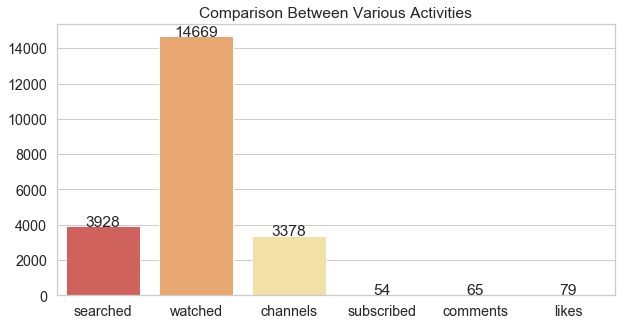

In [7]:
make_activity_bar()

In [17]:
def most_watched_channels():
    channel_activity = {}
    
    for channel in youtube_data.watch_metrics['channels']:
        channel = channel.contents[0]
        if channel in channel_activity:
            channel_activity[channel] += 1
        else:
            channel_activity[channel] = 1
            
    most_viewed = sorted(channel_activity.items(), key=lambda ca:(ca[1],ca[0]), reverse=True)[:10]
    #Goes to show that these numbers could present a wrong picture without the 'last seen'
    
    plt.figure(figsize=(20,5))
    sns.set(style='whitegrid', font_scale = 1.3)
    splot = sns.barplot(y=[c[0] for c in most_viewed], x=[c[1] for c in most_viewed], palette="Spectral")
    for p in splot.patches:
        width = p.get_width()
        splot.text(width, p.get_y() + p.get_height()/2 + 0.1, "{:1.0f}".format(width), ha="left")
    plt.title("Top 10 Channels Watched")
    pp.savefig()
    

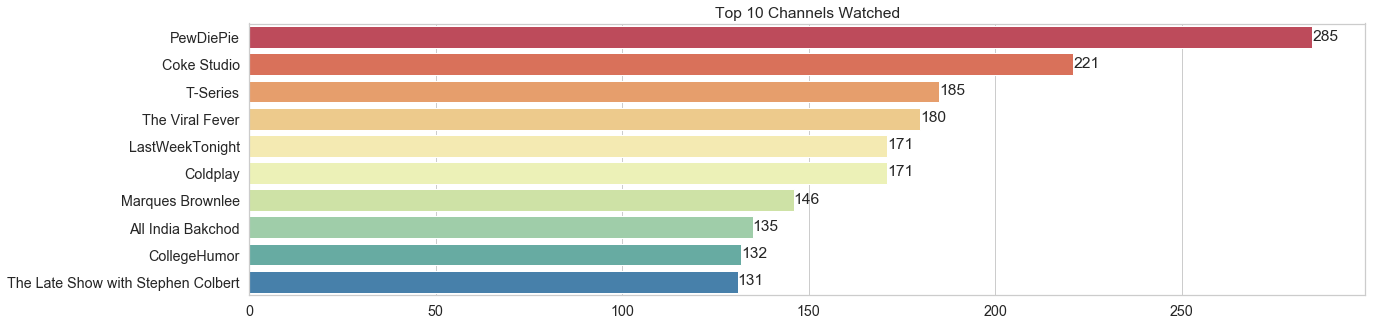

In [18]:
most_watched_channels()

In [10]:
def daywise_comparison():
    weekly_watches_overall = defaultdict(int)
    weekly_watches_current = defaultdict(int)
    weekly_watches_prev = defaultdict(int)
    weekly_watches_prevtoprev = defaultdict(int)
    
    current_year = datetime.now().strftime("%Y")
    prev = str(int(current_year)-1)
    prevtoprev = str(int(current_year)-2)
    
    
    for time in youtube_data.watch_metrics['timestamps']:
        weekday = time.strftime("%a")
        weekly_watches_overall[weekday] += 1
        
        if time.strftime("%Y") == current_year:
            weekly_watches_current[weekday] += 1
        elif time.strftime("%Y") == prev:
            weekly_watches_prev[weekday] += 1
        elif time.strftime("%Y") == prevtoprev:
            weekly_watches_prevtoprev[weekday] += 1
        
    
    plt.figure(figsize=(10,5))
    sns.set(style='whitegrid', font_scale = 1.3)
    splot_overall = sns.barplot(x=list(weekly_watches_overall.keys()),y=list(weekly_watches_overall.values()), palette="Spectral")
    for p in splot_overall.patches:
        height = p.get_height()
        splot_overall.text(p.get_x() + p.get_width()/2, height, "{:1.0f}".format(height), ha="center")
    plt.title("Daywise Comparison Since Begininning Of Time")
    pp.savefig()
    
    if weekly_watches_current:
        plt.figure(figsize=(10,5))
        sns.set(style='whitegrid', font_scale = 1.3)
        splot_current = sns.barplot(x=list(weekly_watches_current.keys()),y=list(weekly_watches_current.values()), palette="Spectral")
        for p in splot_current.patches:
            height = p.get_height()
            splot_current.text(p.get_x() + p.get_width()/2, height, "{:1.0f}".format(height), ha="center")
        plt.title("Daywise Comparison for "+current_year)
        pp.savefig()
    
    if weekly_watches_prev:
        plt.figure(figsize=(10,5))
        sns.set(style='whitegrid', font_scale = 1.3)
        splot_prev = sns.barplot(x=list(weekly_watches_prev.keys()),y=list(weekly_watches_prev.values()), palette="Spectral")
        for p in splot_prev.patches:
            height = p.get_height()
            splot_prev.text(p.get_x() + p.get_width()/2, height, "{:1.0f}".format(height), ha="center")
        plt.title("Daywise Comparison for "+prev)
        pp.savefig()
    
    if weekly_watches_prevtoprev:
        plt.figure(figsize=(10,5))
        sns.set(style='whitegrid', font_scale = 1.3)
        splot_prevtoprev = sns.barplot(x=list(weekly_watches_prevtoprev.keys()),y=list(weekly_watches_prevtoprev.values()), palette="Spectral")
        for p in splot_prevtoprev.patches:
            height = p.get_height()
            splot_prevtoprev.text(p.get_x() + p.get_width()/2, height, "{:1.0f}".format(height), ha="center")
        plt.title("Daywise Comparison for "+prevtoprev)
        pp.savefig()
    


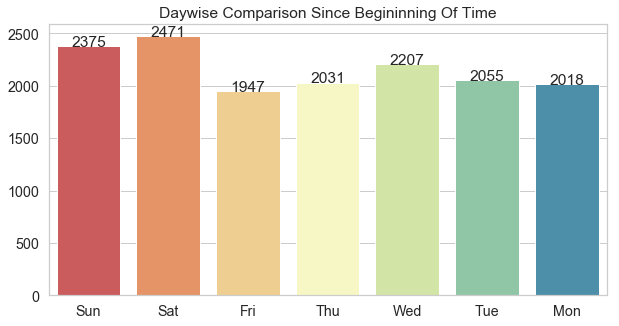

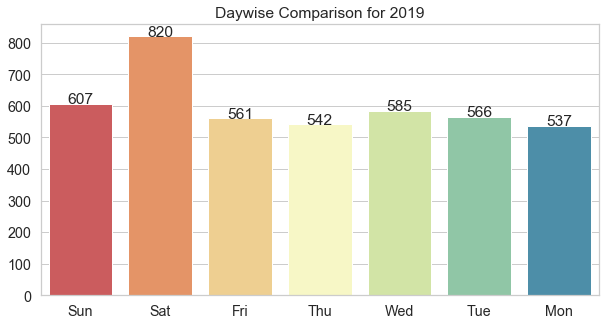

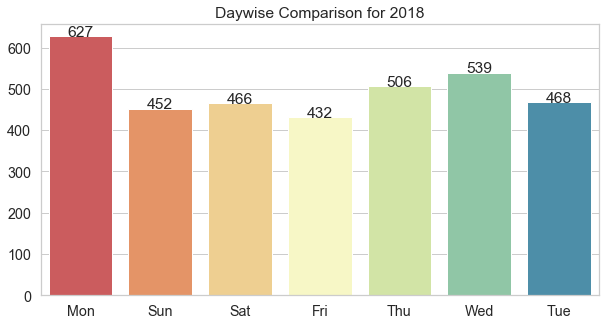

In [11]:
daywise_comparison()

In [19]:
def make_heatmap():
    heatmap_data = [[0]*12 for _ in range(7)]
    days = ["Sun", "Mon", "Tue", "Wed", "Thur", "Fri", "Sat"]
    time_intervals = ["0AM to 2 AM", "2AM to 4 AM", "4AM to 6 AM", "6AM to 8 AM", "8AM to 10 AM", 
                      "10AM to 12PM", "12PM to 2PM", "2PM to 4PM", "4PM to 6PM", "6PM to 8PM", "8PM to 10PM", "10PM to 12AM"]
    
    for time in youtube_data.watch_metrics['timestamps']:
        heatmap_data[int(time.strftime("%w"))][int(time.strftime("%H"))//2] += 1
    
    plt.figure(figsize=(20,14))
    sns.set(font_scale = 1.4)
    sns.heatmap(heatmap_data, xticklabels=time_intervals, yticklabels=days, cmap="YlOrRd")
    plt.title("At What Times Are You Most Active?")
    pp.savefig()
    

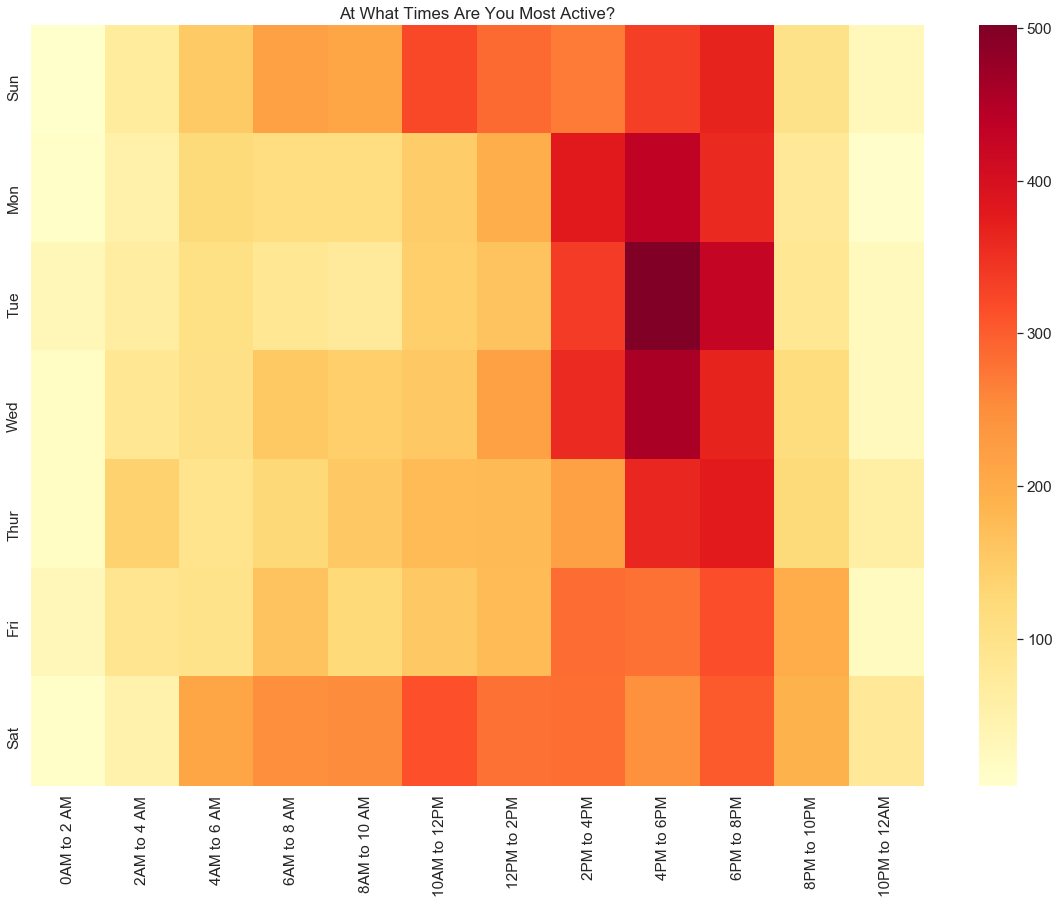

In [20]:
make_heatmap()

In [21]:
pp.close()